Модель сети Хопфилда в синхронном режиме с дискретным состоянием и дискретным временем

In [48]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from random import random, randint, choice
from PIL import Image
from copy import deepcopy

In [49]:
# data = pd.read_csv('data.csv')
# label = None
# while label in [None,0,1,2,3,4,5,6,7,8,9]:
#     num = randint(0,9999)
#     label, ex = np.array(data.iloc[num])[0], np.array(data.iloc[num])[1:]
# bipolar = np.vectorize(lambda x: 255 if x > 127 else 0)
# ex = bipolar(ex).reshape(28,28)
# plt.title(str(label) + "," + str(num))
# plt.imshow(ex, cmap='gray')
#-------------------------------------------
# im = Image.fromarray(ex.astype(np.uint8))
# im.save("Numbers/1.png")

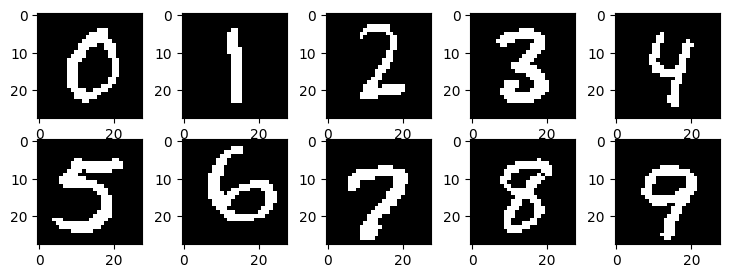

In [50]:
bipolar = np.vectorize(lambda x: 1 if x == 255 else -1)
data = []
for i in range(10):
    img = Image.open(f'numbers/{i}.png')
    number = np.asarray(img)
    data.append(bipolar(number.reshape(784,1)))
plt.rcParams["figure.figsize"] = (9,3)
figuere, axs = plt.subplots(2, 5)
for i in range(10):
    axs[i//5, i%5].imshow(data[i].reshape(28,28), cmap = 'gray')

In [51]:
class HopfieldNetwork:
    def __init__(self, data):
        self.data = data
        self.w = np.zeros((784,784))
        
    def train_projections(self):
        for i in range(10):
            up = (self.w@self.data[i] - self.data[i])@(self.w@self.data[i] - self.data[i]).T
            self.w += up/(self.data[i].T@self.data[i] - self.data[i].T@self.w@self.data[i])
    

    def train_delta_projections(self, mu = 0.1):
        for _ in range(10):
            for i in range(10):
                self.w += (mu/10)*((self.data[i] - self.w@self.data[i])@self.data[i].T)
            
            
    def test(self, img):
        res = self.w@img
        for i in range(100):
            res = self.w@res
        sign = np.vectorize(lambda x: -1 if x<0 else 1)
        return sign(res)

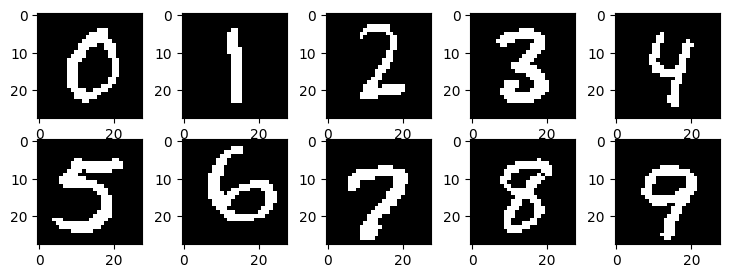

In [52]:
Net = HopfieldNetwork(data)
Net.train_projections()
figuere, axs = plt.subplots(2, 5)
plt.rcParams["figure.figsize"] = (9,3)
for i in range(10):
    axs[i//5, i%5].imshow(Net.test(data[i]).reshape(28,28), cmap = 'gray')

In [53]:
def bi_noise(img, lvl = 0.1):
    new_noise = np.vectorize(lambda x: x if random()>lvl else -1*x)
    return new_noise(img)

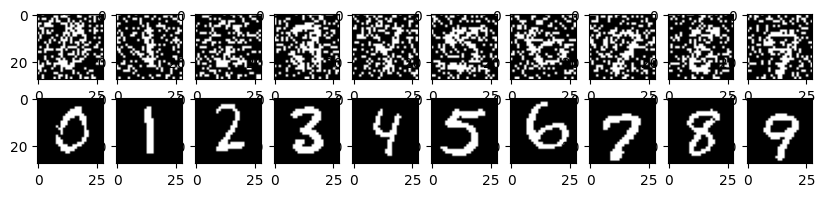

In [54]:
plt.rcParams["figure.figsize"] = (10,2)
figuere, axs = plt.subplots(2, 10)
noise_lvl = 0.25 #percentage of transformed pixels
for i in range(10):
    noise_data = bi_noise(data[i], lvl = noise_lvl)
    axs[0, i].imshow(noise_data.reshape(28,28), cmap = 'gray')
    axs[1, i].imshow(Net.test(noise_data).reshape(28,28), cmap = 'gray')